In [1]:
%%bash
# --------------------------------------------------------------------------------
# 形態素解析器のインストール（6分ぐらい）
# --------------------------------------------------------------------------------

# MeCab
apt-get update
apt-get install mecab file swig libmecab-dev mecab-ipadic-utf8
pip install mecab-python3==0.996.5
git clone https://github.com/neologd/mecab-ipadic-neologd.git
echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n

# JUMAN
wget https://github.com/ku-nlp/jumanpp/releases/download/v2.0.0-rc2/jumanpp-2.0.0-rc2.tar.xz
tar xfv jumanpp-2.0.0-rc2.tar.xz  
cd jumanpp-2.0.0-rc2
mkdir bld
cd bld
cmake .. -DCMAKE_BUILD_TYPE=Release -DCMAKE_INSTALL_PREFIX=/usr/local
make install -j2
cd ../../
pip install pyknp

# Janome
pip install Janome

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,376 kB]
Hit:12 http://ppa.l

Cloning into 'mecab-ipadic-neologd'...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.6M  100 11.6M    0     0   617k      0  0:00:19  0:00:19 --:--:-- 2869k
./../../libexec/iconv_euc_to_utf8.sh ./Prefix.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Verb.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Postp-col.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Symbol.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Adverb.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Interjection.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Adnominal.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Suffix.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Adj.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.others.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.org.csv 
./../../libexec/iconv_euc_to_utf8.sh ./Noun.name.csv 
./../../libexec/

In [2]:
'''
--------------------------------------------------------------------------------
MeCab による単語分割と品詞付与
--------------------------------------------------------------------------------
'''

import MeCab
tokenizer = MeCab.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

text = "千と千尋の神隠しを観に行った"

# 単語分割
print("\n===============\n単語分割\n===============")
node = tokenizer.parseToNode(text)
while node:
    print(node.surface)
    node = node.next

# 品詞付与
print("\n===============\n品詞付与\n===============")
node = tokenizer.parseToNode(text)
while node:
    print(node.feature)
    node = node.next

# 文を単語と品詞のリストに変換
print("\n===============\n単語と品詞のリスト\n===============")
word_list, pos_list = list(), list()
node = tokenizer.parseToNode(text)
while node:
    word_list.append(node.surface)
    pos_list.append(node.feature.split(",")[0])
    node = node.next
print(word_list[1:-1])
print(pos_list[1:-1])


単語分割

千と千尋の神隠し
を
観
に
行っ
た


品詞付与
BOS/EOS,*,*,*,*,*,*,*,*
名詞,固有名詞,一般,*,*,*,千と千尋の神隠し,セントチヒロノカミカクシ,セントチヒロノカミカクシ
助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
名詞,一般,*,*,*,*,観,カン,カン
助詞,格助詞,一般,*,*,*,に,ニ,ニ
動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
BOS/EOS,*,*,*,*,*,*,*,*

単語と品詞のリスト
['千と千尋の神隠し', 'を', '観', 'に', '行っ', 'た']
['名詞', '助詞', '名詞', '助詞', '動詞', '助動詞']


In [3]:
'''
--------------------------------------------------------------------------------
JUMAN による単語分割と品詞付与
--------------------------------------------------------------------------------
'''

from pyknp import Juman
tokenizer = Juman()

text = "千と千尋の神隠しを観に行った"

# 単語分割
print("\n===============\n単語分割\n===============")
tokens = tokenizer.analysis(text)
for token in tokens.mrph_list():
    print(token.midasi)

# 品詞付与
print("\n===============\n品詞付与\n===============")
tokens = tokenizer.analysis(text)
for token in tokens.mrph_list():
    print(token.hinsi)

# 文を単語と品詞のリストに変換
print("\n===============\n単語と品詞のリスト\n===============")
word_list, pos_list = list(), list()
tokens = tokenizer.analysis(text)
for token in tokens.mrph_list():
    word_list.append(token.midasi)
    pos_list.append(token.hinsi)
print(word_list)
print(pos_list)


単語分割
千
と
千尋
の
神
隠し
を
観
に
行った

品詞付与
名詞
助詞
名詞
助詞
名詞
名詞
助詞
動詞
助詞
動詞

単語と品詞のリスト
['千', 'と', '千尋', 'の', '神', '隠し', 'を', '観', 'に', '行った']
['名詞', '助詞', '名詞', '助詞', '名詞', '名詞', '助詞', '動詞', '助詞', '動詞']


In [4]:
'''
--------------------------------------------------------------------------------
Janome による単語分割と品詞付与
--------------------------------------------------------------------------------
'''

from janome.tokenizer import Tokenizer
tokenizer = Tokenizer()

text = "千と千尋の神隠しを観に行った"

# 単語分割
print("\n===============\n単語分割\n===============")
for token in tokenizer.tokenize(text):
    print(token.surface)

# 品詞付与
print("\n===============\n品詞付与\n===============")
for token in tokenizer.tokenize(text):
    print(token.part_of_speech)

# 文を単語と品詞のリストに変換
print("\n===============\n単語と品詞のリスト\n===============")
word_list, pos_list = list(), list()
for token in tokenizer.tokenize(text):
    word_list.append(token.surface)
    pos_list.append(token.part_of_speech.split(",")[0])
print(word_list)
print(pos_list)


単語分割
千
と
千尋
の
神隠し
を
観
に
行っ
た

品詞付与
名詞,数,*,*
助詞,格助詞,引用,*
名詞,一般,*,*
助詞,連体化,*,*
名詞,一般,*,*
助詞,格助詞,一般,*
名詞,一般,*,*
助詞,格助詞,一般,*
動詞,自立,*,*
助動詞,*,*,*

単語と品詞のリスト
['千', 'と', '千尋', 'の', '神隠し', 'を', '観', 'に', '行っ', 'た']
['名詞', '助詞', '名詞', '助詞', '名詞', '助詞', '名詞', '助詞', '動詞', '助動詞']


In [5]:
%%bash
# --------------------------------------------------------------------------------
# データのダウンロード
# --------------------------------------------------------------------------------
mkdir dataset
curl -Ss https://www.rondhuit.com/download/livedoor-news-data.tar.gz > dataset/dataset.tar.gz
cd dataset
tar -xvf dataset.tar.gz
rm dataset.tar.gz
cd ../

dokujo-tsushin.xml
it-life-hack.xml
kaden-channel.xml
livedoor-homme.xml
movie-enter.xml
peachy.xml
smax.xml
sports-watch.xml
topic-news.xml


In [6]:
'''
--------------------------------------------------------------------------------
データの読み込み
--------------------------------------------------------------------------------
'''

import glob
import xml.etree.ElementTree as ET

def get_data(file_name, target):
    data = list()
    tree = ET.parse(file_name)
    for doc in tree.getroot():
        for element in doc:
            if element.attrib["name"] == target:
                data.append(element.text)
    return data

titles, labels = list(), list()
for file_name in glob.glob("dataset/*.xml"):
    titles.extend(get_data(file_name, target="title"))
    labels.extend(get_data(file_name, target="cat"))

print("titles: %d" % len(titles))
print(titles[:5])
print("labels: %d" % len(labels))
print(labels[:5])

titles: 7367
['【ニュース】電力使用量９日が８社管内で今夏最高', 'スマートフォンを選ぶときの注意【デジ通】', '静かにお掃除！パナソニックから運転音53ｄBのサイクロン掃除機登場', '3D対応！パナソニックからブルーレイディーガ\u3000プレミアムモデル2機種が新発売', '【ガイガーカウンター特集】これなら手が届く！\u30002万円以下の家庭用放射線計測器大集合']
labels: 7367
['kaden-channel', 'kaden-channel', 'kaden-channel', 'kaden-channel', 'kaden-channel']


In [7]:
'''
--------------------------------------------------------------------------------
MeCab による単語分割と品詞付与
--------------------------------------------------------------------------------
'''

import MeCab
mecab = MeCab.Tagger()

def morphological_analysis(sentence, mecab):
    surfaces = list()
    features = list()
    node = mecab.parseToNode(sentence)
    while node:
        surfaces.append(node.surface)
        features.append(node.feature)
        node = node.next
    return surfaces[1:-1], features[1:-1]

for title in titles[:5]:
    print(title)
    print(morphological_analysis(title, mecab)[0])
    print(morphological_analysis(title, mecab)[1])
    print()

【ニュース】電力使用量９日が８社管内で今夏最高
['【', 'ニュース', '】', '電力', '使用', '量', '９', '日', 'が', '８', '社', '管内', 'で', '今夏', '最高']
['記号,括弧開,*,*,*,*,【,【,【', '名詞,一般,*,*,*,*,ニュース,ニュース,ニュース', '記号,括弧閉,*,*,*,*,】,】,】', '名詞,一般,*,*,*,*,電力,デンリョク,デンリョク', '名詞,サ変接続,*,*,*,*,使用,シヨウ,シヨー', '名詞,接尾,一般,*,*,*,量,リョウ,リョウ', '名詞,数,*,*,*,*,９,キュウ,キュー', '名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ', '助詞,格助詞,一般,*,*,*,が,ガ,ガ', '名詞,数,*,*,*,*,８,ハチ,ハチ', '名詞,接尾,助数詞,*,*,*,社,シャ,シャ', '名詞,一般,*,*,*,*,管内,カンナイ,カンナイ', '助詞,格助詞,一般,*,*,*,で,デ,デ', '名詞,副詞可能,*,*,*,*,今夏,コンカ,コンカ', '名詞,一般,*,*,*,*,最高,サイコウ,サイコー']

スマートフォンを選ぶときの注意【デジ通】
['スマート', 'フォン', 'を', '選ぶ', 'とき', 'の', '注意', '【', 'デジ', '通', '】']
['名詞,固有名詞,人名,姓,*,*,スマート,スマート,スマート', '名詞,一般,*,*,*,*,フォン,フォン,フォン', '助詞,格助詞,一般,*,*,*,を,ヲ,ヲ', '動詞,自立,*,*,五段・バ行,基本形,選ぶ,エラブ,エラブ', '名詞,非自立,副詞可能,*,*,*,とき,トキ,トキ', '助詞,連体化,*,*,*,*,の,ノ,ノ', '名詞,サ変接続,*,*,*,*,注意,チュウイ,チューイ', '記号,括弧開,*,*,*,*,【,【,【', '名詞,一般,*,*,*,*,*', '名詞,接尾,一般,*,*,*,通,ドオリ,ドーリ', '記号,括弧閉,*,*,*,*,】,】,】']

静かにお掃除！パナソニックから運転音53ｄBのサイクロン掃除機登場
['静か', 'に', 'お', '掃除', '！', 'パナソニック', 'から', '運転', 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (5,662 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 146484 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

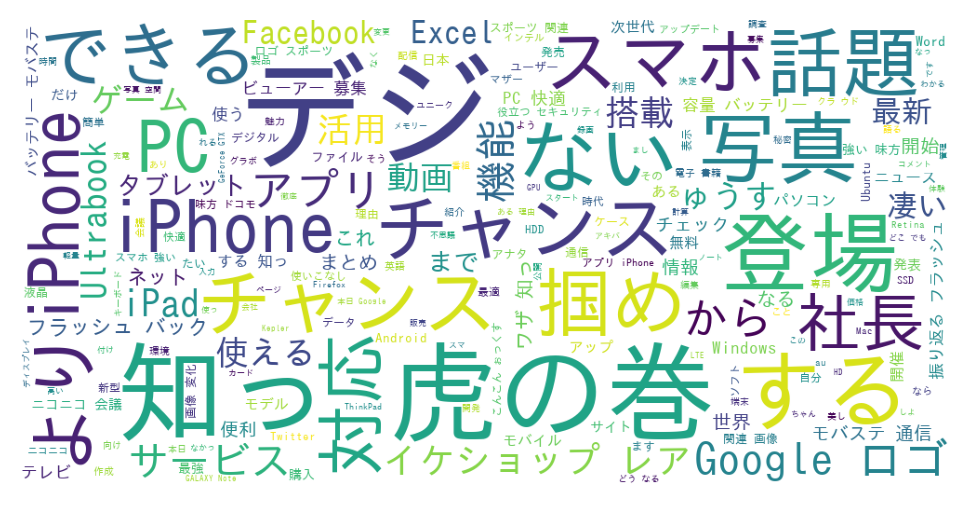

<Figure size 432x288 with 0 Axes>

In [8]:
'''
--------------------------------------------------------------------------------
Word Cloud の描画
--------------------------------------------------------------------------------
'''
!apt-get install fonts-ipafont-gothic
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(text):
    wc = WordCloud(font_path=font_path, background_color="white", width=1000, height=500).generate(text)
    plt.figure(dpi=200)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()
    plt.savefig("sample.png")

text = str()
for title, label in zip(titles, labels):
    if label == "it-life-hack":
        for word in morphological_analysis(title, mecab)[0]:
            text = text + " " + word

show_wordcloud(text)

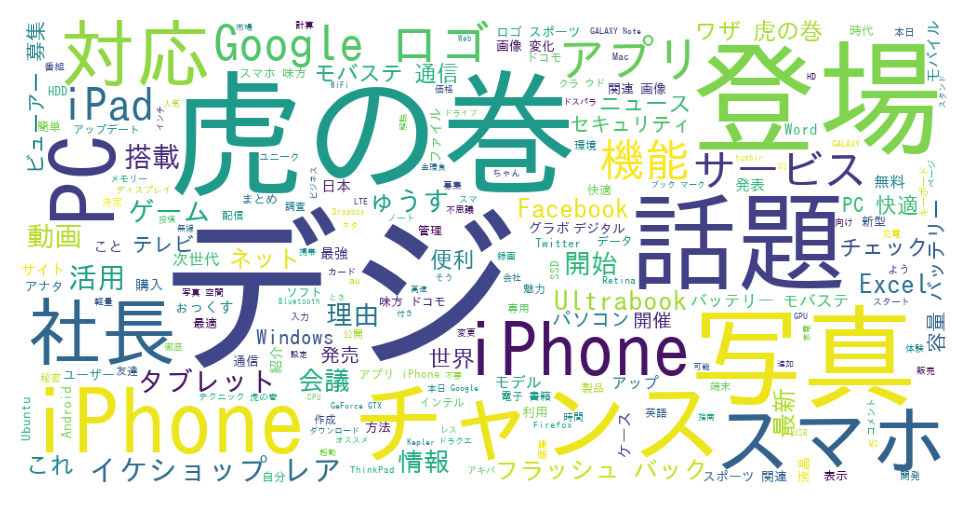

<Figure size 432x288 with 0 Axes>

In [9]:
'''
--------------------------------------------------------------------------------
Word Cloud の編集：名詞のみに絞る
--------------------------------------------------------------------------------
'''
text = str()
for title, label in zip(titles, labels):
    if label == "it-life-hack":
        surfaces, features = morphological_analysis(title, mecab)
        for surface, feature in zip(surfaces, features):
            if feature.split(",")[0] == "名詞":
                text = text + " " + surface

show_wordcloud(text)

In [10]:
'''
--------------------------------------------------------------------------------
頻度を数える
--------------------------------------------------------------------------------
'''
from collections import defaultdict

word2freq = defaultdict(int)
for title, label in zip(titles, labels):
    if label == "it-life-hack":
        for word in morphological_analysis(title, mecab)[0]:
            word2freq[word] += 1

for word, freq in sorted(word2freq.items(), key=lambda x: x[1], reverse=True)[:100]:
    print("%d\t%s" % (freq, word))

803	の
781	！
503	を
417	】
410	に
410	【
385	が
342	で
247	　
195	は
179	「
178	」
147	デジ
146	通
132	た
124	な
115	？
110	も
98	知っ
98	得
97	iPhone
96	虎の巻
90	と
86	て
84	、
80	する
66	登場
64	PC
60	し
60	ない
57	-
55	写真
51	スマホ
51	Google
50	か
49	・
48	新
48	アプリ
47	紺
47	子
45	や
45	チャンス
45	3
43	社長
43	話題
42	掴め
42	より
42	対応
40	できる
40	だ
39	ロゴ
39	化
38	さ
38	大
37	孫
36	IT
36	1
36	iPad
34	から
34	う
31	活用
31	術
31	日
30	機能
29	サービス
29	通信
29	用
29	搭載
28	人
28	へ
28	イケショップ
28	物
28	情報
27	なる
27	お
27	快適
27	レア
27	超
26	Ultrabook
26	バッテリー
25	ドコモ
25	2
24	使える
24	Excel
24	タブレット
24	ゲーム
24	よ
24	中
24	動画
24	5
24	第
24	Facebook
23	.
23	募集
23	何
23	理由
23	開始
23	容量
23	ゅうす
23	技


In [11]:
'''
--------------------------------------------------------------------------------
頻度を比較する
--------------------------------------------------------------------------------
'''
word2freq = defaultdict(lambda: defaultdict(int))
for title, label in zip(titles, labels):
    for word in morphological_analysis(title, mecab)[0]:
        word2freq[label][word] += 1

for label in set(labels):
    word_list = list()
    for word, freq in sorted(word2freq[label].items(), key=lambda x: x[1], reverse=True)[:10]:
        word_list.append(word)
    print("%s\t%s" % (label, " ".join(word_list)))

topic-news	の に 「 」 が で を 、 は と
smax	を 「 」 の ！ 、 に 】 で 【
dokujo-tsushin	の ？ は に 女 が ！ 「 」 を
kaden-channel	】 【 の が ！ 　 話題 に を 「
movie-enter	の が 、 に を 『 』 “ ” 映画
it-life-hack	の ！ を 】 に 【 が で 　 は
peachy	の を に ！ 「 」 で が 】 【
livedoor-homme	の に 「 」 を が . vol ！ 】
sports-watch	の 、 【 】 Sports Watch に 「 」 は


In [25]:
'''
--------------------------------------------------------------------------------
相互情報量を比較する  log( p(x,y) / p(x)p(y) )
--------------------------------------------------------------------------------
'''
import math
import numpy as np

# p(単語)
word2freq = defaultdict(int)
sum_freq = 0
for title in titles:
    for word in morphological_analysis(title, mecab)[0]:
        word2freq[word] += 1
        sum_freq += 1
word2prob = defaultdict(float)
for word, freq in word2freq.items():
    word2prob[word] = freq / sum_freq

# p(ラベル)
label2freq = defaultdict(int)
sum_freq = 0
for label in labels:
    label2freq[label] += 1
    sum_freq += 1
label2prob = defaultdict(float)
for label, freq in label2freq.items():
    label2prob[label] = freq / sum_freq

# p(単語, ラベル)
wl2freq = defaultdict(lambda: defaultdict(int))
sum_freq = 0
for title, label in zip(titles, labels):
    for word in morphological_analysis(title, mecab)[0]:
        wl2freq[label][word] += 1
        sum_freq += 1
wl2prob = defaultdict(lambda: defaultdict(float))
for word in wl2freq.keys():
    for label, freq in wl2freq[word].items():
        wl2prob[word][label] = freq / sum_freq

print(np.nonzero(word2prob.values()) / len(word2prob.values()))
print(np.nonzero(label2prob.values()) / len(label2prob.values()))

# 相互情報量
pmi = defaultdict(lambda: defaultdict(float))
for word in wl2prob.keys():
    for label in wl2prob[word].keys():
        pmi[label][word] = wl2freq[word][label] * math.log(wl2prob[word][label] / (word2prob[word] * label2prob[label]))

# 表示
for label in set(labels):
    word_list = list()
    for word, score in sorted(pmi[label].items(), key=lambda x: x[1], reverse=True)[:10]:
        word_list.append(word)
    print("%s\t%s" % (label, " ".join(word_list)))

TypeError: ignored